In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [18]:
news2020 = pd.read_csv('./news/2020년.csv')
news2020.head(5)

,제목,링크,기관,날짜,시간
0,폭스바겐 전기차 목표 상향에…국내 배터리업체 '바쁜 2020년' 전망,https://finance.naver.com/news/news_read.nhn?a...,헤럴드경제,2020-01-01,22:47
1,"""외국인 코스닥 집중 매수… 연초엔 중소형주 주목""",https://finance.naver.com/news/news_read.nhn?a...,파이낸셜뉴스,2020-01-01,18:13
2,연초부터 기대감 한몸에… 반도체株 목표주가 상향,https://finance.naver.com/news/news_read.nhn?a...,파이낸셜뉴스,2020-01-01,18:13
3,대기업 구조조정 일단락… P-CBO 발행 2년 새 2조원 감소,https://finance.naver.com/news/news_read.nhn?a...,파이낸셜뉴스,2020-01-01,18:13
4,'1월 효과' 노린 우량채 줄섰다,https://finance.naver.com/news/news_read.nhn?a...,파이낸셜뉴스,2020-01-01,18:13


In [6]:
news2020.isnull().values.any()

False

In [7]:
# 정규 표현식 한글 외 문자 제거
news2020['제목'] = news2020['제목'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [8]:
news2020.head(5)

,제목,링크,기관,날짜,시간
0,폭스바겐 전기차 목표 상향에국내 배터리업체 바쁜 년 전망,https://finance.naver.com/news/news_read.nhn?a...,헤럴드경제,2020-01-01,22:47
1,외국인 코스닥 집중 매수 연초엔 중소형주 주목,https://finance.naver.com/news/news_read.nhn?a...,파이낸셜뉴스,2020-01-01,18:13
2,연초부터 기대감 한몸에 반도체 목표주가 상향,https://finance.naver.com/news/news_read.nhn?a...,파이낸셜뉴스,2020-01-01,18:13
3,대기업 구조조정 일단락 발행 년 새 조원 감소,https://finance.naver.com/news/news_read.nhn?a...,파이낸셜뉴스,2020-01-01,18:13
4,월 효과 노린 우량채 줄섰다,https://finance.naver.com/news/news_read.nhn?a...,파이낸셜뉴스,2020-01-01,18:13


In [9]:
# 불용어 처리
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [11]:
okt = Okt()
tokenized = []
for sentence in news2020['제목']:
    temp_X = okt.morphs(sentence,stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized.append(temp_X)

기사 제목 최대 길이 :  19
기사 제목 평균 길이 :  9.346441947565543


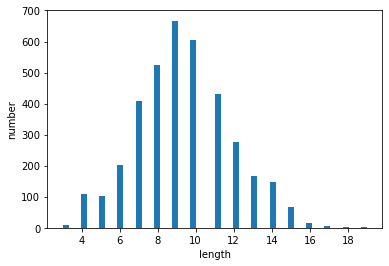

In [12]:
print('기사 제목 최대 길이 : ',max(len(l) for l in tokenized))
print('기사 제목 평균 길이 : ',sum(map(len,tokenized))/len(tokenized))
plt.hist([len(s) for s in tokenized],bins = 50)
plt.xlabel('length')
plt.ylabel('number')
plt.show()

In [13]:
from gensim.models import Word2Vec
model = Word2Vec(
    sentences = tokenized
    ,size = 100 # 100차원
    ,window=5 # 앞뒤로 비교할 크기
    ,min_count = 5 # 출현 빈도
    ,workers=4 # 학습을 위한 프로세스 수
    ,sg = 0 # CBOW
)

In [14]:
# 완성된 임베딩 매트릭스 크기 확인
model.wv.vectors.shape

(1200, 100)

In [17]:
print(model.wv.most_similar('자동차'))

[('부진', 0.9987672567367554), ('뉴욕증시', 0.9987625479698181), ('주가', 0.9987350702285767), ('대신', 0.9987243413925171), ('게임', 0.9987215995788574), ('주식', 0.9987108707427979), ('매출', 0.9987099170684814), ('최대', 0.998700737953186), ('한국', 0.9986990094184875), ('온라인', 0.9986966848373413)]
